In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [3]:
df = pd.read_csv('D:\PYTHON_EXERCISES_LUKE\job_postings_flat_from_luke.csv')

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skills: ast.literal_eval(skills) if pd.notna(skills) else skills)

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\User\AppData\Local\Temp\ipykernel_16352\3129965082.py:1: SyntaxWarning: invalid escape sequence '\P'
  df = pd.read_csv('D:\PYTHON_EXERCISES_LUKE\job_postings_flat_from_luke.csv')


In [4]:
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Data Analyst,Data Analyst,"New York, NY",via CareerBuilder,Full-time,False,"New York, United States",2023-01-01 00:00:04,False,False,United States,NaN,NaN,NaN,Metasys Technologies,"[sql, snowflake, visio, jira, confluence]","{'analyst_tools': ['visio'], 'async': ['jira',..."
1,Data Analyst,Data Analyst,"Washington, DC",via CareerBuilder,Full-time,False,"New York, United States",2023-01-01 00:00:22,False,True,United States,NaN,NaN,NaN,Guidehouse,"[sql, python, r, azure, snowflake, databricks,...","{'analyst_tools': ['tableau', 'excel'], 'cloud..."
2,Data Analyst,Data Analyst,"Fairfax, VA",via CareerBuilder,Full-time,False,"New York, United States",2023-01-01 00:00:24,False,False,United States,NaN,NaN,NaN,Protask,"[sql, jira]","{'async': ['jira'], 'programming': ['sql']}"
3,Senior Data Analyst,Senior Data Analyst / Platform Experience,"Worcester, MA",via LinkedIn,Full-time,False,"New York, United States",2023-01-01 00:00:27,False,True,United States,NaN,NaN,NaN,Atria Wealth Solutions,"[sql, atlassian, jira]","{'async': ['jira'], 'other': ['atlassian'], 'p..."
4,Data Analyst,Data Analyst,"Sunnyvale, CA",via CareerBuilder,Full-time,False,"California, United States",2023-01-01 00:00:38,False,False,United States,NaN,NaN,NaN,"ICONMA, LLC","[sql, python]","{'programming': ['sql', 'python']}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615925,Data Scientist,Tutor-Reviewer For Data Science Program,"San Salvador, El Salvador",Dr. Job,Full-time,False,El Salvador,2025-06-30 07:08:26,True,False,El Salvador,NaN,NaN,NaN,TripleTen,"[python, sql]","{'programming': ['python', 'sql']}"
1615926,Data Engineer,DATA ENGINEER,"Abidjan, Côte d’Ivoire",LinkedIn,Full-time,False,Côte d'Ivoire,2025-06-30 07:11:05,False,False,Côte d'Ivoire,NaN,NaN,NaN,RED TIC,"[sql, nosql, mongodb, mongodb, python, scala, ...","{'cloud': ['aws', 'azure', 'gcp', 'bigquery'],..."
1615927,Data Analyst,Data Analyst - Moldova,Anywhere,Yopeso Romania SRL,Full-time,True,Moldova,2025-06-30 07:11:10,False,False,Moldova,NaN,NaN,NaN,Yopeso Romania SRL,"[sql, python, aws, gcp, tableau, power bi, loo...","{'analyst_tools': ['tableau', 'power bi', 'loo..."
1615928,Data Analyst,"Junior Data Analyst / Developer, Nature for Wa...","Internatsionalnaya, Kyrgyzstan",ClimateTechList,Full-time,False,Kyrgyzstan,2025-06-30 07:12:09,True,False,Kyrgyzstan,NaN,NaN,NaN,The Nature Conservancy,NaN,NaN


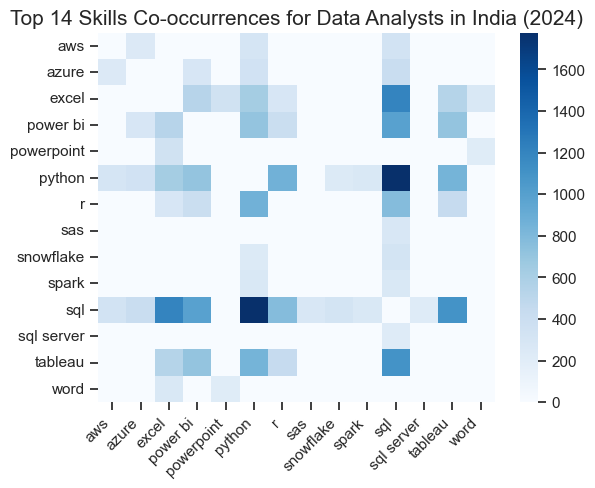

In [77]:
from itertools import combinations
from collections import Counter

df_IN_2024 = (df[
        (df['job_posted_date'].dt.year == 2024) & 
        (df['job_country'] == 'India') &
        (df['job_title_short'] == 'Data Analyst')
    ]
).copy()

df_IN_2024.dropna(subset='job_skills', inplace=True)

top_n = 30
coocurrence = Counter()

for skills in df_IN_2024['job_skills']:
    pairs = combinations(sorted(set(skills)), 2)
    coocurrence.update(pairs)

pairs, counts = zip(*coocurrence.items())
df_pairs = pd.DataFrame(pairs, columns=['Skill_1', 'Skill_2'])
df_pairs['count'] = counts
df_pairs = df_pairs.sort_values(by='count', ascending=False).head(top_n)

cooc_matrix = df_pairs.pivot_table(
    index='Skill_1',
    columns='Skill_2',
    values='count',
    fill_value=0
)

skills = sorted(set(df_pairs['Skill_1']).union(set(df_pairs['Skill_2']))) # df_pairs['Skill_1'] dan df_pairs['Skill_2'] harus dijadiin set dulu, karena dia tipenya adalah Series, sedangkan union() punyanya si set. Nanti hasil dari sorted adalah list.
cooc_matrix = cooc_matrix.reindex(index=skills, columns=skills, fill_value=0)
cooc_matrix = cooc_matrix + cooc_matrix.T

sns.set_theme(style='ticks')

sns.heatmap(cooc_matrix, cmap="Blues")

plt.xlabel('')
plt.xticks(rotation=45, ha='right')
plt.ylabel('')
plt.yticks(rotation=0, ha='right')
plt.title(f'Top {len(skills)} Skills Co-occurrences for Data Analysts in India (2024)', fontsize=15)

plt.show()

In [72]:
from itertools import combinations
from collections import Counter

df_IN_2024 = (df[
        (df['job_posted_date'].dt.year == 2024) & 
        (df['job_country'] == 'India') &
        (df['job_title_short'] == 'Data Analyst')
    ]
).copy()

df_IN_2024.dropna(subset='job_skills', inplace=True)

top_n = 10
coocurrence = Counter()

for skills in df_IN_2024['job_skills']:
    pairs = combinations(sorted(set(skills)), 2)
    coocurrence.update(pairs)

pairs, counts = zip(*coocurrence.items())
df_pairs = pd.DataFrame(pairs, columns=['Skill_1', 'Skill_2'])
df_pairs['count'] = counts

cooc_matrix = df_pairs.pivot_table(
    index='Skill_1',
    columns='Skill_2',
    values='count',
    fill_value=0
)

# skills = sorted(set(df_pairs['Skill_1']).union(set(df_pairs['Skill_2'])))
# cooc_matrix = cooc_matrix.reindex(index=skills, columns=skills, fill_value=0)
cooc_matrix = cooc_matrix + cooc_matrix.T

# HASIL cooc_matrix DARI SINI BELUM TENTU BENAR, KARENA INDEXNYA BELUM DISAMAIN. JADI MISALNYA ADA SKILL YANG GK PERNAH MUNCUL SEBAGAI SKILL 2,
# MAKA KOLOMNYA HILANG -> HASIL AKHIRNYA MASIH ADA NaN.

In [49]:
df_pairs['count'].sort_values(ascending=False)

18      1777
9       1202
20      1103
16       987
39       864
        ... 
2736       1
2735       1
2734       1
2733       1
2524       1
Name: count, Length: 3728, dtype: int64

In [52]:
df_pairs.sort_values(by='count', ascending=False).head(top_n)

,Skill_1,Skill_2,count
18,python,sql,1777
9,excel,sql,1202
20,sql,tableau,1103
16,power bi,sql,987
39,python,r,864
19,python,tableau,844
63,r,sql,774
17,power bi,tableau,714
15,power bi,python,712
8,excel,python,629


In [74]:
skills

['excel', 'power bi', 'python', 'r', 'sql', 'tableau']

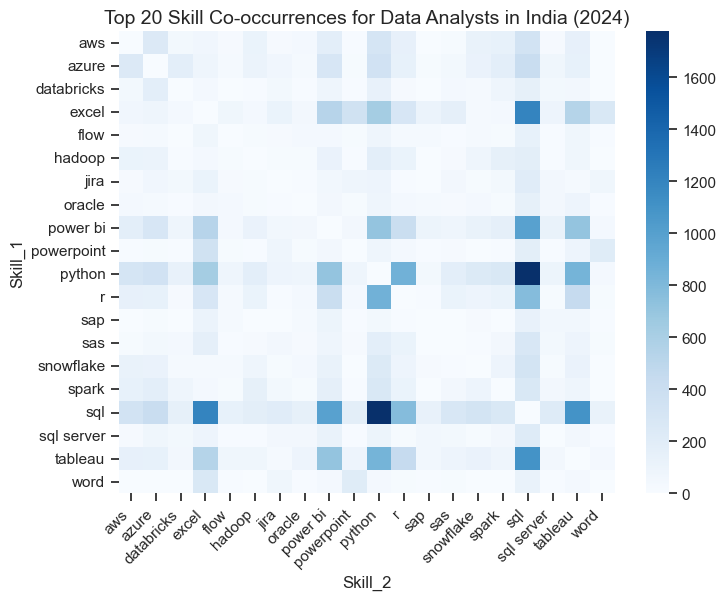

In [80]:
from itertools import combinations
from collections import Counter

df_IN_2024 = (df[
        (df['job_posted_date'].dt.year == 2024) & 
        (df['job_country'] == 'India') & 
        (df['job_title_short'] == 'Data Analyst')
    ].copy()
)

df_IN_2024.dropna(subset=['job_skills'], inplace=True)

# Hitung frekuensi masing-masing skill
skill_counter = Counter()
for skills in df_IN_2024['job_skills']:
    skill_counter.update(skills)

# Ambil top N skills
top_n = 20
top_skills = set([s for s, _ in skill_counter.most_common(top_n)])

# Hitung co-occurrence tapi hanya untuk skill di top N
coocurrence = Counter()
for skills in df_IN_2024['job_skills']:
    filtered = top_skills.intersection(skills)  # keep hanya top skills
    pairs = combinations(sorted(filtered), 2)
    coocurrence.update(pairs)

# Convert ke DataFrame
pairs, counts = zip(*coocurrence.items())
df_pairs = pd.DataFrame(pairs, columns=['Skill_1', 'Skill_2'])
df_pairs['count'] = counts

# Buat matrix
skills = sorted(top_skills)
cooc_matrix = df_pairs.pivot_table(
    index='Skill_1', 
    columns='Skill_2', 
    values='count', 
    fill_value=0
)

cooc_matrix = cooc_matrix.reindex(index=skills, columns=skills, fill_value=0)
cooc_matrix = cooc_matrix + cooc_matrix.T

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cooc_matrix, cmap="Blues")
plt.title(f"Top {top_n} Skill Co-occurrences for Data Analysts in India (2024)", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.show()

In [81]:
df_IN_2024

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
787426,Data Analyst,"Capital Market Data Analyst- Part time, Remote",India,via Jobrapido.com,Part-time,False,India,2024-01-01 00:05:16,True,False,India,NaN,NaN,NaN,Next Recruiting,"[sql, python, bigquery, excel, looker, power b...","{'analyst_tools': ['excel', 'looker', 'power b..."
787427,Data Analyst,"Capital Market Data Analyst- Part time, Remote",India,via Jobrapido.com,Part-time,False,India,2024-01-01 00:05:16,True,False,India,NaN,NaN,NaN,Next Recruiting,"[sql, python, bigquery, excel, looker, power b...","{'analyst_tools': ['excel', 'looker', 'power b..."
787842,Data Analyst,Data Analyst,Anywhere,via LinkedIn,Full-time,True,India,2024-01-01 06:07:39,True,False,India,NaN,NaN,NaN,Recruin,[tableau],{'analyst_tools': ['tableau']}
787843,Data Analyst,Data Analyst,"Bengaluru, Karnataka, India",via LinkedIn,Full-time,False,India,2024-01-01 06:07:49,False,False,India,NaN,NaN,NaN,Careernet,"[r, python, postgresql, aws, tableau, cognos, ...","{'analyst_tools': ['tableau', 'cognos', 'alter..."
788027,Data Analyst,Data Analyst BA,"Gujarat, India",via Shine,Full-time,False,India,2024-01-01 10:07:53,False,False,India,NaN,NaN,NaN,Alp Consulting Ltd.,"[sql, sql server]","{'databases': ['sql server'], 'programming': [..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269438,Data Analyst,Streaming Data Analyst,"Hyderabad, Telangana, India",DAZN Careers,Full-time,False,India,2024-12-31 06:24:27,True,False,India,NaN,NaN,NaN,DAZN,"[sql, snowflake, tableau, git, jira, airtable]","{'analyst_tools': ['tableau'], 'async': ['jira..."
1269439,Data Analyst,Campaign and Customer Analytics,India,Trabajo.org,Full-time,False,India,2024-12-31 06:24:30,False,False,India,NaN,NaN,NaN,Comviva,"[sql, oracle]","{'cloud': ['oracle'], 'programming': ['sql']}"
1269440,Data Analyst,Campaign and Customer Analytics,India,Trabajo.org,Full-time,False,India,2024-12-31 06:24:30,False,False,India,NaN,NaN,NaN,Comviva,"[sql, oracle]","{'cloud': ['oracle'], 'programming': ['sql']}"
1271291,Data Analyst,Tableau engineer,India,Shine,Full-time,False,India,2024-12-31 23:24:38,True,False,India,NaN,NaN,NaN,Virtusa,"[sql, python, sql server, oracle, databricks, ...","{'analyst_tools': ['tableau', 'excel', 'altery..."


In [82]:
skill_counter

Counter({'sql': 2992,
         'python': 2075,
         'excel': 1814,
         'tableau': 1419,
         'power bi': 1204,
         'r': 918,
         'sas': 660,
         'azure': 570,
         'aws': 418,
         'powerpoint': 363,
         'snowflake': 335,
         'spark': 307,
         'word': 288,
         'databricks': 244,
         'jira': 233,
         'sql server': 226,
         'sap': 213,
         'flow': 206,
         'hadoop': 206,
         'oracle': 191,
         'gcp': 186,
         'pyspark': 161,
         'looker': 155,
         'scala': 152,
         'bigquery': 147,
         'redshift': 143,
         'alteryx': 142,
         'javascript': 141,
         'dax': 138,
         'spss': 129,
         'git': 125,
         'java': 115,
         'airflow': 115,
         'pandas': 112,
         'vba': 108,
         'go': 107,
         'outlook': 106,
         'mysql': 96,
         'sheets': 93,
         'visio': 87,
         'nosql': 84,
         'numpy': 80,
         'qli

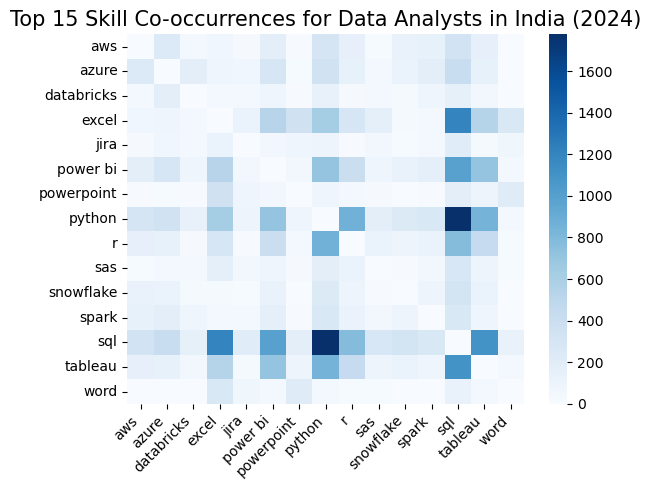

In [58]:
# FINAL

from collections import Counter
from itertools import combinations

# Filter data
df_2024_IN = df[
    (df['job_posted_date'].dt.year == 2024) &
    (df['job_title_short'] == 'Data Analyst') &
    (df['job_country'] == 'India')
].copy()

df_2024_IN.dropna(subset='job_skills', inplace=True)

skills_count = Counter()

for skills in df_2024_IN['job_skills']:
    skills_count.update(skills)

##-----------------------------------------------------
## Versi count pakai loop biasa tanpa Counter()
# skills_count1 = {}
# 
# for skills_1 in df_2024_IN['job_skills']:
#     for s in skills_1:
#         if s in skills_count1:
#             skills_count1[s] += 1
#         else:
#             skills_count1[s] = 1
##-----------------------------------------------------

top_n = 15
top_skills1 = set([s1 for s1, _ in skills_count.most_common(top_n)])

coocurrence1 = Counter()

for skills_2 in df_2024_IN['job_skills']:
    filtered1 = top_skills1.intersection(skills_2)
    paired1 = combinations(sorted(filtered1), 2)
    coocurrence1.update(paired1)

pairs1, cnt = zip(*coocurrence1.items())
df_pairs1 = pd.DataFrame(pairs1, columns=['Skill_1', 'Skill_2'])
df_pairs1['cnt'] = cnt

df_matrix = df_pairs1.pivot_table(
    index='Skill_1',
    columns='Skill_2',
    values='cnt',
    fill_value=0
)

skill_names = sorted(top_skills1)
df_matrix = df_matrix.reindex(index=skill_names, columns=skill_names, fill_value=0)
df_matrix = df_matrix + df_matrix.T

sns.heatmap(data=df_matrix, cmap='Blues')
plt.title(f"Top {top_n} Skill Co-occurrences for Data Analysts in India (2024)", fontsize=15)
plt.xlabel('')
plt.xticks(rotation=45, ha="right")
plt.ylabel('')
plt.yticks(rotation=0)

plt.show()

In [47]:
df_pairs1

,Skill_1,Skill_2,cnt
0,excel,power bi,530
1,excel,python,629
2,excel,sql,1202
3,excel,tableau,537
4,power bi,python,712
...,...,...,...
100,aws,word,6
101,sas,snowflake,7
102,databricks,sas,38
103,snowflake,word,1


In [50]:
top_skills1

{'aws',
 'azure',
 'databricks',
 'excel',
 'jira',
 'power bi',
 'powerpoint',
 'python',
 'r',
 'sas',
 'snowflake',
 'spark',
 'sql',
 'tableau',
 'word'}